In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
DATADIR="/kaggle/input/chest-xray-pneumonia/chest_xray/train"
CAT=['NORMAL',"PNEUMONIA"]

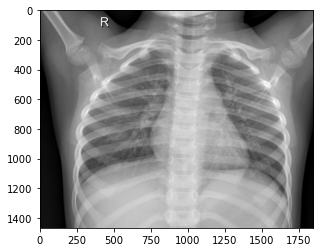

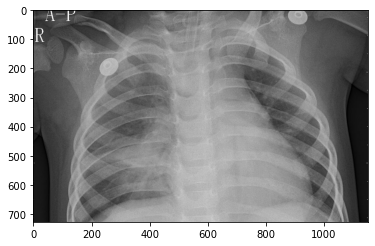

In [7]:
for cat in CAT:
    path=os.path.join(DATADIR,cat)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break

In [9]:
 img_array.shape

(728, 1152)

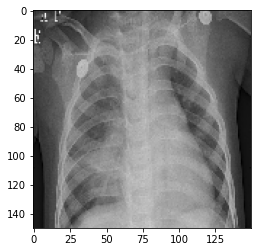

In [18]:
IMG_Size=150
new_array=cv2.resize(img_array,(IMG_Size,IMG_Size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [20]:
training_data=[]
def create_training_data():
    for cat in CAT:
        lb=CAT.index(cat)
        path=os.path.join(DATADIR,cat)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(IMG_Size,IMG_Size))
            training_data.append([new_array,lb])
        

In [23]:
create_training_data()

In [26]:
len(training_data)

5216

In [31]:
X=[]
Y=[]
for features,lab in training_data:
    X.append(features)
    Y.append(lab)

In [33]:
X=np.array(X).reshape(-1,IMG_Size,IMG_Size,1)

In [51]:
Y=np.array(Y)

In [35]:
X.shape

(5216, 150, 150, 1)

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,MaxPooling2D
from keras.layers import Flatten,Activation
from keras.layers import Dense

In [39]:
X_data=X/255

In [43]:
X.shape[1:]

(150, 150, 1)

In [118]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(150, 150, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X,Y,batch_size=16,epochs=5)


Epoch 1/5
326/326 [==============================] - 278s 854ms/step - loss: 0.6277 - accuracy: 0.8321
Epoch 2/5
326/326 [==============================] - 276s 847ms/step - loss: 0.1647 - accuracy: 0.9419
Epoch 3/5
326/326 [==============================] - 278s 854ms/step - loss: 0.1346 - accuracy: 0.9540
Epoch 4/5
326/326 [==============================] - 278s 853ms/step - loss: 0.1020 - accuracy: 0.9617
Epoch 5/5
326/326 [==============================] - 276s 848ms/step - loss: 0.0952 - accuracy: 0.9655


In [134]:
model.save('my_model')

In [127]:
img=cv2.imread('../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg',cv2.IMREAD_GRAYSCALE)

In [129]:
new_image_array=cv2.resize(img,(150,150))

[]

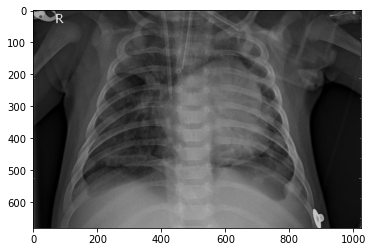

In [100]:
plt.imshow(img,cmap='gray')
plt.plot()

In [93]:
new_image_array.shape

(150, 150)

In [88]:
img.shape

(762, 1106)

In [130]:
X_test_data=np.array(new_image_array).reshape(-1,150,150,1)

In [131]:
X_test_data=X_test_data/255

In [132]:
lb1=model.predict(X_test_data)

In [133]:
lb1

array([[0.9429669]], dtype=float32)